In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

raw_data = loadmat('data/ex5data1.mat')
raw_data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

In [2]:
for key, value in raw_data.items() :
    print (key, value)

__header__ b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011'
__version__ 1.0
__globals__ []
X [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]
y [[  2.13431051]
 [  1.17325668]
 [ 34.35910918]
 [ 36.83795516]
 [  2.80896507]
 [  2.12107248]
 [ 14.71026831]
 [  2.61418439]
 [  3.74017167]
 [  3.73169131]
 [  7.62765885]
 [ 22.7524283 ]]
Xtest [[-33.31800399]
 [-37.91216403]
 [-51.20693795]
 [ -6.13259585]
 [ 21.26118327]
 [-40.31952949]
 [-14.54153167]
 [ 32.55976024]
 [ 13.39343255]
 [ 44.20988595]
 [ -1.14267768]
 [-12.76686065]
 [ 34.05450539]
 [ 39.22350028]
 [  1.97449674]
 [ 29.6217551 ]
 [-23.66962971]
 [ -9.01180139]
 [-55.94057091]
 [-35.70859752]
 [  9.51020533]]
ytest [[  3.31688953]
 [  5.39768952]
 [  0.13042984]
 [  6.1925982 ]
 [ 17.08848712]
 [  0.79950805]
 [  2.82479183]
 [ 28.62123334]
 [ 17.04639

In [129]:
X=raw_data['X']
y=raw_data['y']
Xtest=raw_data['Xtest']
ytest=raw_data['ytest']
Xval=raw_data['Xval']
yval=raw_data['yval']
X.shape,y.shape,Xval.shape,yval.shape

((12, 1), (12, 1), (21, 1), (21, 1))

In [58]:
def lin_cost(params,X,y,learning_rate):
    theta=np.matrix(np.reshape(params,(X.shape[1]+1,1)))
    m=X.shape[0]
    X1=np.insert(X, 0, values=np.ones(m), axis=1)
    h=np.dot(X1,theta)
    JNR=np.multiply((1/(2*m)),np.sum((np.power((h-y),2))))
    reg=(learning_rate/(2*m))*np.sum((np.power(theta[:,1:],2)))
    J=JNR+reg
    J=np.sum(J)
    return J

In [13]:
theta=np.ones(shape=[2,1])
params=np.zeros((X.shape[1]+1,1))
learning_rate=0
X.shape, theta.shape, y.shape
paramsP=np.zeros((poly(X,4).shape[1]+1,1))
params.shape, theta.shape
lin_cost(paramsP,poly(X,4),y,learning_rate)

[[  1.00000000e+00  -1.59367581e+01   2.53980260e+02  -4.04762197e+03
    6.45059724e+04]
 [  1.00000000e+00  -2.91529792e+01   8.49896197e+02  -2.47770062e+04
    7.22323546e+05]
 [  1.00000000e+00   3.61895486e+01   1.30968343e+03   4.73968522e+04
    1.71527069e+06]
 [  1.00000000e+00   3.74921873e+01   1.40566411e+03   5.27014222e+04
    1.97589159e+06]
 [  1.00000000e+00  -4.80588295e+01   2.30965109e+03  -1.10999128e+05
    5.33448815e+06]
 [  1.00000000e+00  -8.94145794e+00   7.99496701e+01  -7.14866612e+02
    6.39194974e+03]
 [  1.00000000e+00   1.53077929e+01   2.34328523e+02   3.58705250e+03
    5.49098568e+04]
 [  1.00000000e+00  -3.47062658e+01   1.20452489e+03  -4.18045609e+04
    1.45088020e+06]
 [  1.00000000e+00   1.38915437e+00   1.92974986e+00   2.68072045e+00
    3.72393452e+00]
 [  1.00000000e+00  -4.43837599e+01   1.96991814e+03  -8.74323736e+04
    3.88057747e+06]
 [  1.00000000e+00   7.01350208e+00   4.91892115e+01   3.44988637e+02
    2.41957852e+03]
 [  1.0000

140.95412088055392

In [127]:
def lin_gradient(params,X,y,learning_rate):
    J=lin_cost(params,X,y,learning_rate)
    theta=np.matrix(np.reshape(params,(X.shape[1]+1,1)))
    m=X.shape[0]
    X=np.insert(X, 0, values=np.ones(m), axis=1)
    h=np.dot(X,theta)
    gradNR=np.multiply((1/m),(np.dot(X.T,(h-y))))
    reg=np.multiply(((learning_rate)/m),theta)
    grad=gradNR+reg
    grad[0]=gradNR[0]
    grad=np.sum(grad,axis=1)
    grad=np.squeeze(np.asarray(grad))
    #grad=grad.flatten()
    return J, grad

NameError: name 'polX' is not defined

In [16]:
def trainLinReg(theta,X,y):
    m=X.shape[0]
    X=np.insert(X, 0, values=np.ones(m), axis=1)
    h=np.dot(X,theta)
    JTR=(1/(2*m))*(np.power((h-y),2))
    return JTR

In [18]:
trainLinReg(theta,X,y)

array([[  1.21425577e+01],
       [  3.58345047e+01],
       [  3.33807811e-01],
       [  1.14020169e-01],
       [  1.03616539e+02],
       [  4.21893826e+00],
       [  1.06336866e-01],
       [  5.49656293e+01],
       [  7.60519890e-02],
       [  9.24944058e+01],
       [  6.20312493e-03],
       [  4.25311563e-02]])

In [22]:
import scipy.optimize as sc_opt
def fmin_linear(func,params,X,y,learning_rate):
    fmin = sc_opt.minimize(func, params, args=(X,y,learning_rate), 
                method='TNC', jac=True, options={'maxiter': 500})
    return fmin.x
fmin_linear(lin_gradient,params,X,y,learning_rate)

[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.      

array([ 13.08790351,   0.36777923])

NameError: name 'fmin' is not defined

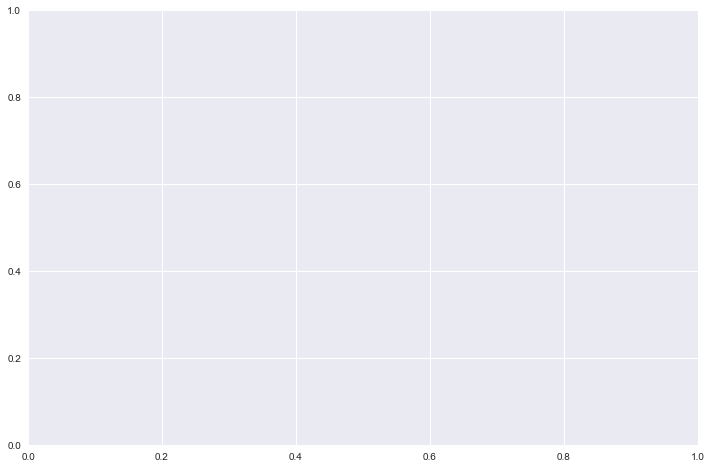

In [126]:
m=X.shape[0]
X1=np.insert(X, 0, values=np.ones(m), axis=1)
theta1=np.matrix(np.reshape(params,(X.shape[1]+1,1)))
fig, ax = plt.subplots(figsize=(12,8))
X1.shape, np.dot(X1,theta1).shape,theta1.shape
ax.plot(X,np.dot(X1,fmin.x))
ax.scatter(X,y)

In [124]:
def learningCurve(func,params,X,y,learning_rate,Xval2,yval2):
    m=X.shape[0]
    error_train=np.zeros(shape=m+1)
    error_val=np.zeros(shape=m+1)
    for i in range(m):
        i=i+1
        theta=fmin_linear(func,params,X[:i,:],y[:i],learning_rate)
        params=np.ravel(theta)
        error_train[i]=lin_cost(params,X[:i,:],y[:i],learning_rate)
        error_val[i]=lin_cost(params,Xval2,yval2,learning_rate)
    error_train=error_train[1:]
    error_val=error_val[1:]
    return theta,error_train,error_val


In [125]:
theta1,error_train1,error_val1=learningCurve(lin_gradient,params,X,y,learning_rate,Xval,yval)
theta1,error_train1,error_val1

(array([ 13.08790351,   0.36777923]),
 array([  1.01769539e-18,   2.19625663e-09,   3.28659505e+00,
          2.84267769e+00,   1.31540488e+01,   1.94439625e+01,
          2.00985217e+01,   1.81728587e+01,   2.26094054e+01,
          2.32614616e+01,   2.43172496e+01,   2.23739065e+01]),
 array([ 205.12109571,  110.30288929,   45.0102313 ,   48.36891134,
          35.86516477,   33.82996148,   31.97098581,   30.86244631,
          31.13599796,   28.93620748,   29.55143164,   29.43381813]))

# Training Examples / Train Error / Cross Validation Error
  1                   0.00000000    205.12109571
  2                   0.00000000    110.30288929
  3                   3.28659505    45.01023130
  4                   2.84267769    48.36891134
  5                   13.15404881   35.86516477
  6                   19.44396251   33.82996148
  7                   20.09852166   31.97098581
  8                   18.17285870   30.86244631
  9                   22.60940542   31.13599796
  10                  23.26146159   28.93620748
  11                  24.31724959   29.55143164
  12                  22.37390650   29.43381813


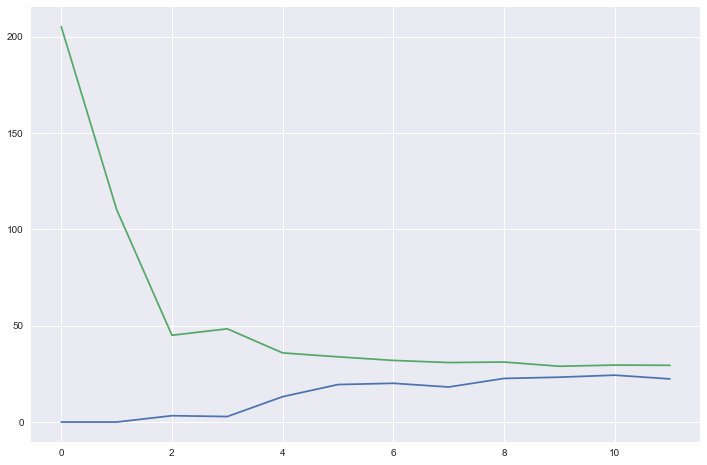

In [130]:
m=X.shape[0]
fig, ax = plt.subplots(figsize=(12,8))
X1.shape, np.dot(X1,theta1).shape,theta1.shape
ax.plot(range(m),error_train1)
ax.plot(range(m),error_val1)
print ('# Training Examples / Train Error / Cross Validation Error')
for i in range(m):
    print ('  {0:<19} {1:<13.8f} {2:<.8f}'.format(i + 1, error_train1[i], error_val1[i]))

In [134]:
def poly(X,p):
    X_poly=np.zeros(shape=[X.shape[0],p])
    X_poly=np.swapaxes(X_poly,0,1)
    X=np.reshape(X,[X.shape[0],])
    for i in range(p):
        X_poly[i,:]=np.power(X,i+1)
    X_poly=np.swapaxes(X_poly,0,1)
    return X_poly

In [169]:
a=poly(X,10)
a[:,1], np.power(X,2),a.shape,X.shape
a[0,:]

array([ -1.59367581e+01,   2.53980260e+02,  -4.04762197e+03,
         6.45059724e+04,  -1.02801608e+06,   1.63832436e+07,
        -2.61095791e+08,   4.16102047e+09,  -6.63131769e+10,
         1.05681706e+12])

In [143]:
def normalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0,ddof=1)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma

In [168]:
a,b,c=normalize(poly(X,8))
a[0,:],b,c

def plot_fit(min_x, max_x, mu, sigma, theta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.
    Parameters
    ----------
    min_x : float
        Minimum value of features.
    max_x : float
        Maximum value of features.
    mu : ndarray, shape (n_features - 1,)
        Mean value of features, without the intercept term.
    sigma : ndarray, shape (n_features - 1,)
        Standard deviation of features, without the intercept term.
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    p : int
        Power of polynomial fit.
    """
    x = np.arange(min_x - 15, max_x + 25, 0.05)
    X_poly = poly_features(x, p)
    X_poly, dummy_mu, dummy_sigma = feature_normalize(X_poly, mu, sigma)
    print(X_poly.shape)
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
    print(X_poly.shape)
    plt.plot(X, X_poly.dot(theta1), linestyle='--', marker='', color='b')

ValueError: shapes (12,8) and (9,) not aligned: 8 (dim 1) != 9 (dim 0)

In [101]:
def poly_reg(params,X,y,Xtest,ytest,Xval,yval,p):
    X_normPX, muPX, sigmaPX=normalize(poly(X,p))
    print('1')
    #X_normPX=np.insert(X_normPX, 0, values=np.ones(X_normPX.shape[0]), axis=1)
    X_normPT, muPT, sigmaPT=normalize(poly(Xtest,p))
    #X_normPT=np.insert(X_normPT, 0, values=np.ones(X_normPT.shape[0]), axis=1)
    X_normVT, muVT, sigmaVT=normalize(poly(Xval,p))
    #X_normVT=np.insert(X_normVT, 0, values=np.ones(X_normVT.shape[0]), axis=1)
    return X_normPX, muPX, sigmaPX, X_normPT, muPT, sigmaPT, X_normVT, muVT, sigmaVT

In [170]:
X_normPX, muPX, sigmaPX, X_normPT, muPT, sigmaPT, X_normVT, muVT, sigmaVT=poly_reg(params,X,y,Xtest,ytest,Xval,yval,8)
X_normPX

1


array([[ -3.62140776e-01,  -7.55086688e-01,   1.82225876e-01,
         -7.06189908e-01,   3.06617917e-01,  -5.90877673e-01,
          3.44515797e-01,  -5.08481165e-01],
       [ -8.03204845e-01,   1.25825266e-03,  -2.47936991e-01,
         -3.27023420e-01,   9.33963187e-02,  -4.35817606e-01,
          2.55416116e-01,  -4.48912493e-01],
       [  1.37746700e+00,   5.84826715e-01,   1.24976856e+00,
          2.45311974e-01,   9.78359696e-01,  -1.21556976e-02,
          7.56568484e-01,  -1.70352114e-01],
       [  1.42093988e+00,   7.06646754e-01,   1.35984559e+00,
          3.95534038e-01,   1.10616178e+00,   1.25637135e-01,
          8.71929081e-01,  -5.96376930e-02],
       [ -1.43414853e+00,   1.85399982e+00,  -2.03716308e+00,
          2.33143133e+00,  -2.41153626e+00,   2.60221195e+00,
         -2.64567451e+00,   2.76608525e+00],
       [ -1.28687086e-01,  -9.75968776e-01,   2.51385075e-01,
         -7.39686869e-01,   3.16952928e-01,  -5.94996630e-01,
          3.45811812e-01,  -5.0

1
here
[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]] [  1.88620887   1.56565412  34.34884556  36.8475567    2.75890226
   2.17449578  14.89169734   2.27190937   4.09278979   3.85911393
   7.20172857  22.71219379]


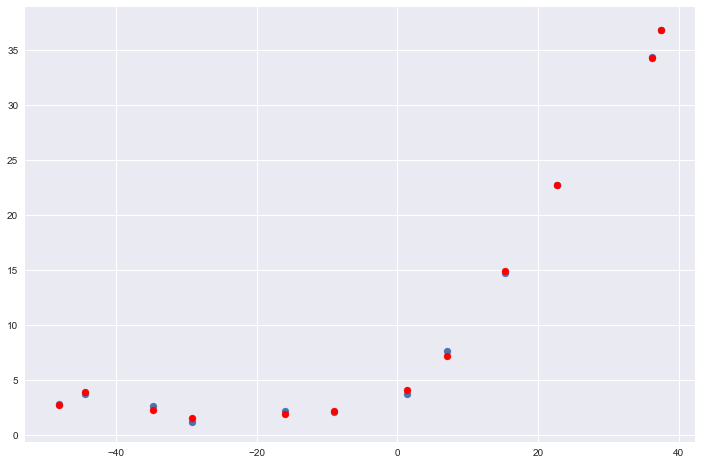

In [184]:
X_normPX, muPX, sigmaPX, X_normPT, muPT, sigmaPT, X_normVT, muVT, sigmaVT=poly_reg(params,X,y,Xtest,ytest,Xval,yval,8)
X_norm,muX,sigmaX=normalize(X)
X.shape
X2=X.ravel()
X_poly=poly(X,8)
paramsP=np.zeros((X_poly.shape[1]+1,1))
theta1,error_train1,error_val1=learningCurve(lin_gradient,paramsP,X_normPX,y,learning_rate,X_normVT,yval)
print('here')
#theta1=trainLinearReg(X_poly,y,learning_rate)
fig, ax = plt.subplots(figsize=(12,8))
bla=np.dot((np.insert(X_normPX,0,values=np.ones(X_poly.shape[0]),axis=1)),theta1)
ax.scatter(X,y)
#print(type(X),type(bla),np.sort(X),np.sort(bla),np.sort(X)==X)
print(X,bla)
ax.scatter(X,bla,color='r')

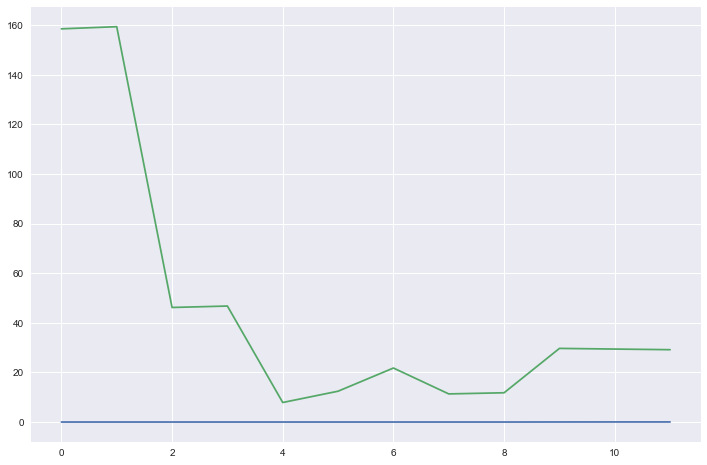

In [189]:
theta1,error_train1,error_val1=learningCurve(lin_gradient,paramsP,X_normPX,y,learning_rate,X_normVT,yval)
m=X.shape[0]
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(m),error_train1)
ax.plot(range(m),error_val1)

1
here
[  2.82798277e-18   1.15181899e-01   1.16376089e+02   1.39443054e+02
   1.26882655e+02   1.18273534e+02   1.01456023e+02   9.44278847e+01
   8.74739488e+01   8.02436629e+01   7.33627365e+01   7.25694477e+01]


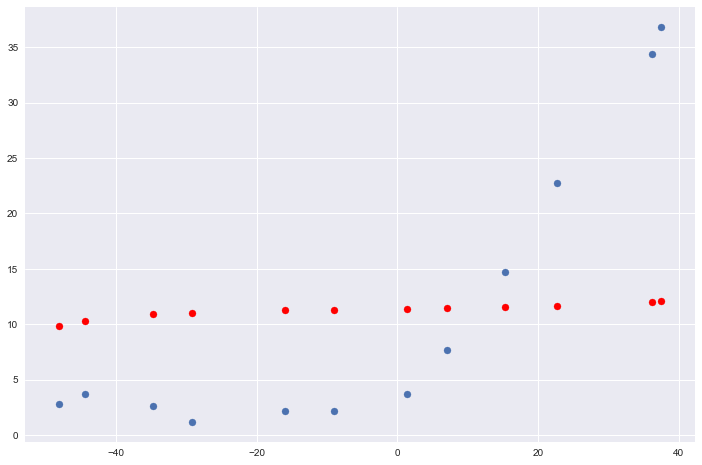

In [198]:
learning_rate=500
X_normPX, muPX, sigmaPX, X_normPT, muPT, sigmaPT, X_normVT, muVT, sigmaVT=poly_reg(params,X,y,Xtest,ytest,Xval,yval,8)
X_norm,muX,sigmaX=normalize(X)
X.shape
X2=X.ravel()
X_poly=poly(X,8)
paramsP=np.zeros((X_poly.shape[1]+1,1))
theta1,error_train1,error_val1=learningCurve(lin_gradient,paramsP,X_normPX,y,learning_rate,X_normVT,yval)
print('here')
#theta1=trainLinearReg(X_poly,y,learning_rate)
fig, ax = plt.subplots(figsize=(12,8))
bla=np.dot((np.insert(X_normPX,0,values=np.ones(X_poly.shape[0]),axis=1)),theta1)
ax.scatter(X,y)
#print(type(X),type(bla),np.sort(X),np.sort(bla),np.sort(X)==X)
ax.scatter(X,bla,color='r')
print(error_train1)

1
0.0782365610309 564.534726289
7.55721654023 355.378379594
15.8675868317 349.911477661
25.8390795218 342.96438804
37.4975002758 346.942787127
50.6659612232 347.048434007
64.5155430157 348.923747715
78.5660290236 351.58600904
93.2217801714 356.109638892
107.795278957 361.592115154
122.200588361 367.227819444
136.579431428 374.010207023
150.79669038 381.282347991
164.601398066 389.006260083
178.311843679 396.84444582
191.804080222 404.836725643
205.102069044 412.995413018
217.982782841 421.152661135
230.572221157 429.338615308
242.848046192 437.501894168
257.540027306 447.559510102
269.234246847 455.521315933
280.665269779 463.53371008
291.799493348 471.450178813
302.647248772 479.26346519
313.220269558 486.969562575
323.524978978 494.559243941
333.582598688 502.044509193
343.396725229 509.413531144
352.94661077 516.589556838
362.416806747 524.006341337
371.562913664 531.035192922
380.501150725 537.947905795
389.151381032 544.72703696
397.690466988 551.403909552
406.026134965 557.969411

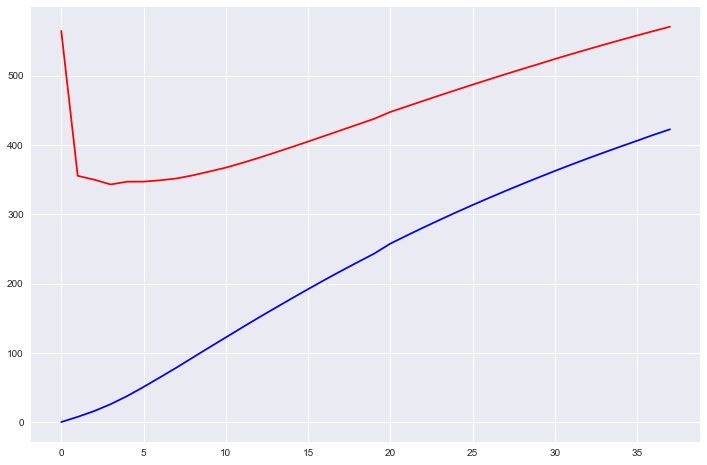

In [248]:
X_normPX, muPX, sigmaPX, X_normPT, muPT, sigmaPT, X_normVT, muVT, sigmaVT=poly_reg(params,X,y,Xtest,ytest,Xval,yval,8)
X_norm,muX,sigmaX=normalize(X)
X2=X.ravel()
X_poly=poly(X,8)
paramsP=np.zeros((X_poly.shape[1]+1,1))
answerT=np.zeros(len(range(0,38)))
answerV=np.zeros(len(range(0,38)))
for i in range(0,38):
    m1=X.shape[0]
    m2=Xval.shape[0]
    learning_rate=i/2
    theta1,error_train1,error_val1=learningCurve(lin_gradient,paramsP,X_normPX,y,learning_rate,X_normVT,yval)
    #answerT[i]=np.sum(np.sum((np.dot(np.insert(X_normPX,0,values=np.ones(X_poly.shape[0]),axis=1),theta1)-y)**2)/(2*m1))
    #answerV[i]=np.sum((np.dot(np.insert(X_normVT,0,values=np.ones(X_normVT.shape[0]),axis=1),theta1)-yval)**2)/(2*m2)
    answerT[i]=np.sum(error_train1)
    answerV[i]=np.sum(error_val1)
    print(answerT[i],answerV[i])
    #print(answerT,answerV)

theta1,error_train1,error_val1=learningCurve(lin_gradient,paramsP,X_normPX,y,learning_rate,X_normVT,yval)
#theta1=trainLinearReg(X_poly,y,learning_rate)
fig, ax = plt.subplots(figsize=(12,8))
#bla=np.dot((np.insert(X_normPX,0,values=np.ones(X_poly.shape[0]),axis=1)),theta1)
#ax.scatter(X,y)
#print(type(X),type(bla),np.sort(X),np.sort(bla),np.sort(X)==X)
print(answerT,answerV)
ax.plot(range(0,38),answerT,color='b')
ax.plot(range(0,38),answerV,color='r')